In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [2]:
train_df=pd.read_csv('C:/Users/hp/Desktop/Datasets/credit card fraud/fraudTrain.csv')
test_df=pd.read_csv('C:/Users/hp/Desktop/Datasets/credit card fraud/fraudTest.csv')

In [3]:
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
is_fraud=train_df['is_fraud'].value_counts()
print("Yes",is_fraud[1])
print('No',is_fraud[0])

Yes 7506
No 1289169


In [5]:
#### data is un-balanced

In [6]:
def preprocessing(df):
    columns=df.shape[1]
    print('Total no of columns are : ',columns)
    rows=df.shape[0]
    print('Total no of rows are : ',rows)
    missing_num=df.isnull().sum()
    print('Total missing no are :\n',missing_num)
    duplicated=df.duplicated().sum()
    print('Total no of duplicates are : ',duplicated)
    data_types=df.dtypes
    print('The datatypes in dataset are :\n ',data_types)
    return(df)

In [7]:
preprocessing(train_df)

Total no of columns are :  23
Total no of rows are :  1296675
Total missing no are :
 Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64
Total no of duplicates are :  0
The datatypes in dataset are :
  Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first            

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [8]:
train_df.groupby('gender')['is_fraud'].count()

gender
F    709863
M    586812
Name: is_fraud, dtype: int64

In [9]:
is_fraud=train_df['is_fraud'].value_counts()
print("Yes",is_fraud[1])
print('No',is_fraud[0])

Yes 7506
No 1289169


([<matplotlib.patches.Wedge at 0x2201907f010>,
 [Text(-1.0998181131964657, 0.02000294690705531, 'yes'),
  Text(1.0998181149229591, -0.020002851979370503, 'no')],
 [Text(-0.5999007890162539, 0.010910698312939258, '99%'),
  Text(0.5999007899579777, -0.010910646534202092, '1%')])

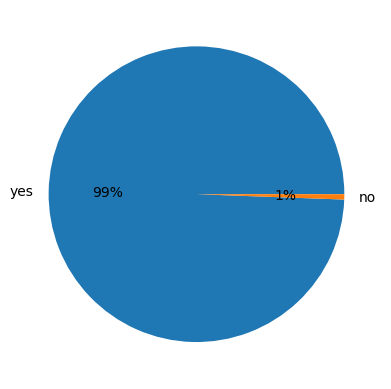

In [10]:
plt.pie(is_fraud,labels=['yes','no'],autopct="%0.0f%%")

In [11]:
#### 99% is not fraud and only 1% is fraud leads to imbalanced data

In [12]:
#### Feature Engineering
### converting object datatype to datetime

In [13]:
train_df['trans_date_trans_time']=pd.to_datetime(train_df['trans_date_trans_time'])
test_df['trans_date_trans_time']=pd.to_datetime(test_df['trans_date_trans_time'])

In [14]:
train_df['hour']=train_df['trans_date_trans_time'].dt.hour
test_df['hour']=test_df['trans_date_trans_time'].dt.hour

In [15]:
train_df['month']=train_df['trans_date_trans_time'].dt.month
test_df['month']=test_df['trans_date_trans_time'].dt.month

In [16]:
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,month
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,1
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,1
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,1
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,1
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,1


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Fraud')

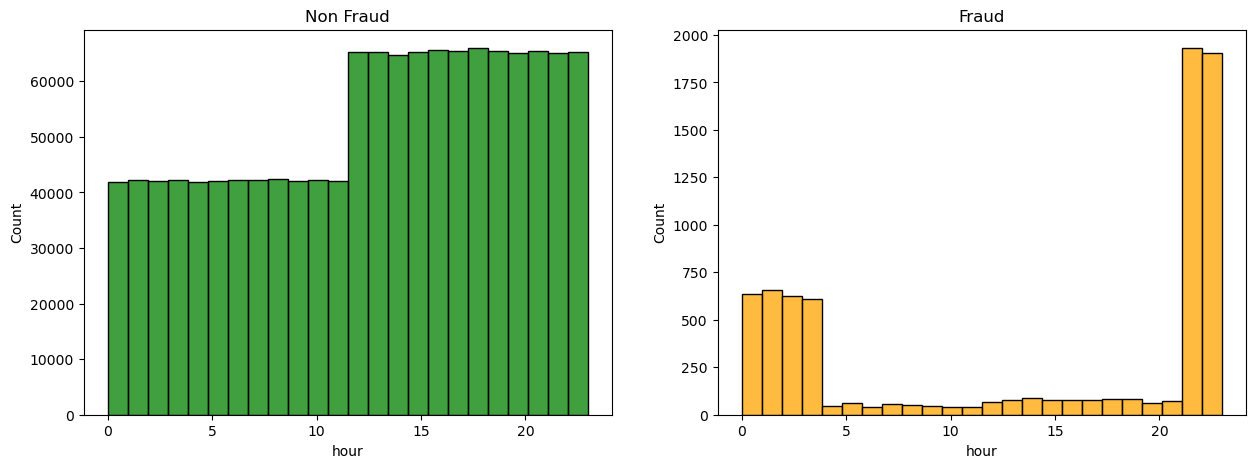

In [17]:
f,(ax1, ax2)=plt.subplots(1,2,figsize=(15,5),sharey=False)
ax1=sns.histplot(x='hour',data=train_df[train_df['is_fraud']==0],bins=24,ax=ax1,color='Green')
ax2=sns.histplot(x='hour',data=train_df[train_df['is_fraud']==1],bins=24,ax=ax2,color='orange')
ax1.set_title('Non Fraud')
ax2.set_title('Fraud')

### It is clear that fraud transactions mainly occur at midnight.

### last 2 hours of the day

In [18]:
unique_transition_count=train_df['trans_num'].nunique()
unique_transition_count

1296675

#### concluding that each transaction has it's own number

In [19]:
### deleting non-useful columns
train_df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'hour', 'month'],
      dtype='object')

In [20]:
column_to_drop=['Unnamed: 0', 'trans_date_trans_time', 'cc_num',  'first', 'street', 'city', 'state', 'zip',
        'dob', 'trans_num', 'unix_time' ]

In [21]:
train_df=train_df.drop(columns=column_to_drop,axis=1)
test_df=test_df.drop(columns=column_to_drop,axis=1)

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 14 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   merchant    1296675 non-null  object 
 1   category    1296675 non-null  object 
 2   amt         1296675 non-null  float64
 3   last        1296675 non-null  object 
 4   gender      1296675 non-null  object 
 5   lat         1296675 non-null  float64
 6   long        1296675 non-null  float64
 7   city_pop    1296675 non-null  int64  
 8   job         1296675 non-null  object 
 9   merch_lat   1296675 non-null  float64
 10  merch_long  1296675 non-null  float64
 11  is_fraud    1296675 non-null  int64  
 12  hour        1296675 non-null  int32  
 13  month       1296675 non-null  int32  
dtypes: float64(5), int32(2), int64(2), object(5)
memory usage: 128.6+ MB


In [23]:
### cleaning merchant column
train_df['merchant']=train_df['merchant'].apply(lambda x:x.replace('fraud_',''))
test_df['merchant']=test_df['merchant'].apply(lambda x:x.replace('fraud_',''))

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 14 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   merchant    1296675 non-null  object 
 1   category    1296675 non-null  object 
 2   amt         1296675 non-null  float64
 3   last        1296675 non-null  object 
 4   gender      1296675 non-null  object 
 5   lat         1296675 non-null  float64
 6   long        1296675 non-null  float64
 7   city_pop    1296675 non-null  int64  
 8   job         1296675 non-null  object 
 9   merch_lat   1296675 non-null  float64
 10  merch_long  1296675 non-null  float64
 11  is_fraud    1296675 non-null  int64  
 12  hour        1296675 non-null  int32  
 13  month       1296675 non-null  int32  
dtypes: float64(5), int32(2), int64(2), object(5)
memory usage: 128.6+ MB


In [25]:
train_df.head()

,merchant,category,amt,last,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,hour,month
0,"Rippin, Kub and Mann",misc_net,4.97,Banks,F,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0,0,1
1,"Heller, Gutmann and Zieme",grocery_pos,107.23,Gill,F,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,0,1
2,Lind-Buckridge,entertainment,220.11,Sanchez,M,42.1808,-112.2620,4154,Nature conservation officer,43.150704,-112.154481,0,0,1
3,"Kutch, Hermiston and Farrell",gas_transport,45.00,White,M,46.2306,-112.1138,1939,Patent attorney,47.034331,-112.561071,0,0,1
4,Keeling-Crist,misc_pos,41.96,Garcia,M,38.4207,-79.4629,99,Dance movement psychotherapist,38.674999,-78.632459,0,0,1


In [26]:
train_df.describe(include='object')

,merchant,category,last,gender,job
count,1296675,1296675,1296675,1296675,1296675
unique,693,14,481,2,494
top,Kilback LLC,gas_transport,Smith,F,Film/video editor
freq,4403,131659,28794,709863,9779


In [27]:
### applying label encoding
train_df['gender']=train_df['gender'].map({'F':0,'M':1})
test_df['gender']=test_df['gender'].map({'F':0,'M':1})

In [28]:
from category_encoders import WOEEncoder

In [29]:
encoder=WOEEncoder()

In [30]:
### applying WOEEncoder
for col in['merchant','category','job','last']:
    train_df[col]=encoder.fit_transform(train_df[col],train_df['is_fraud'])

In [31]:
for col in['merchant','category','job','last']:
    test_df[col]=encoder.fit_transform(test_df[col],test_df['is_fraud'])

In [32]:
train_df.head(3)

,merchant,category,amt,last,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,hour,month
0,0.959326,0.924914,4.97,-2.469513,0,36.0788,-81.1781,3495,-1.080186,36.011293,-82.048315,0,0,1
1,0.663187,0.898799,107.23,-0.673638,0,48.8878,-118.2105,149,-0.904144,49.159047,-118.186462,0,0,1
2,-0.790166,-0.847622,220.11,0.433257,1,42.1808,-112.2620,4154,1.120434,43.150704,-112.154481,0,0,1


In [33]:
#### down sampling and scaling

In [34]:
No_class=train_df[train_df['is_fraud']==0]
Yes_class=train_df[train_df['is_fraud']==1]

In [35]:

from sklearn.utils import resample

In [36]:
No_class.shape

(1289169, 14)

In [37]:
Yes_class.shape

(7506, 14)

In [38]:
No_class=resample(No_class,replace=False,n_samples=len(Yes_class))
down_sample=pd.concat([Yes_class,No_class],axis=0)

In [39]:
X=down_sample.drop('is_fraud',axis=1)
y=down_sample['is_fraud']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.80,)

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scalar=StandardScaler()

In [44]:
X_train=scalar.fit_transform(X_train)
X_test=scalar.fit_transform(X_test)

In [45]:
#### original class count
original_class_count=train_df['is_fraud'].value_counts()
original_class_count

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [46]:
#### percentage of count
original_percent=original_class_count/len(train_df)*100
original_percent

is_fraud
0    99.421135
1     0.578865
Name: count, dtype: float64

<BarContainer object of 2 artists>

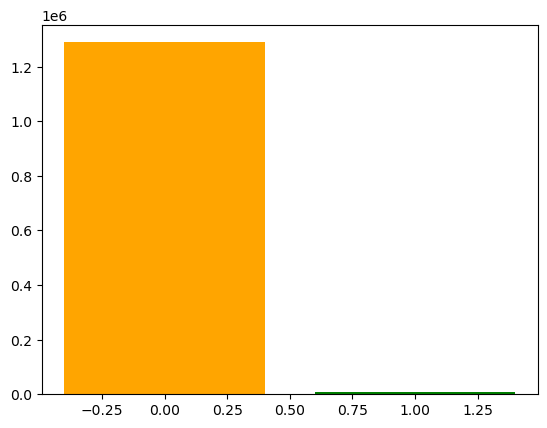

In [47]:
plt.bar(original_class_count.index,original_class_count.values,color=['orange','Green'])

In [48]:
### after down_sampling count
down_sample_class_count=down_sample['is_fraud'].value_counts()
down_sample_class_count

is_fraud
1    7506
0    7506
Name: count, dtype: int64

In [49]:
#### percentage of count
down_sample_percent=down_sample_class_count/len(down_sample)*100
down_sample_percent

is_fraud
1    50.0
0    50.0
Name: count, dtype: float64

<BarContainer object of 2 artists>

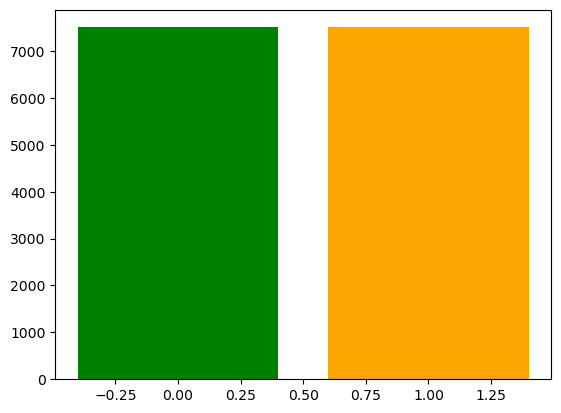

In [50]:
plt.bar(down_sample_class_count.index,down_sample_class_count.values,color=['Orange','Green'])

In [51]:
def logestic_regression():
    model=LogisticRegression()
    model_train=model.fit(X_train,y_train)
    pred=model.predict(X_test)
    return pred

In [52]:
log_pred=logestic_regression()

In [53]:
cf_LR=confusion_matrix(y_test,log_pred)
cf_LR

array([[1372,  105],
       [ 317, 1209]], dtype=int64)

In [54]:
lr_accuracy=accuracy_score(y_test,log_pred)
lr_accuracy

0.8594738594738595

In [55]:
def random_forest(X,y):
    model=RandomForestClassifier(criterion='entropy',)
    model_train=model.fit(X_train,y_train)
    pred=model_train.predict(X_test)
    return pred
    

In [56]:
def decision_tree(X,y):
    model=DecisionTreeClassifier(criterion='entropy')
    model_train=model.fit(X_train,y_train)
    pred=model_train.predict(X_test)
    return pred

In [57]:
rm_pred=random_forest(X,y)

In [58]:
cf_rm=confusion_matrix(y_test,rm_pred)
cf_rm

array([[1432,   45],
       [ 192, 1334]], dtype=int64)

In [59]:
rf_accuracy=accuracy_score(y_test,rm_pred)
rf_accuracy

0.9210789210789211

In [60]:
dc_pred=decision_tree(X,y)

In [61]:
cf_dc=confusion_matrix(y_test,dc_pred)
cf_dc

array([[1424,   53],
       [ 210, 1316]], dtype=int64)

In [62]:
dt_accuracy=accuracy_score(y_test,dc_pred)
dt_accuracy

0.9124209124209124

In [63]:
Algorithms=['Logestic Regression',"Random Forest",'Decision Tree']
Accuracy=[lr_accuracy,rf_accuracy,dt_accuracy]

In [64]:
Final_result=pd.DataFrame({'Algorithms':Algorithms,'Accuracy':Accuracy})

In [65]:
Final_result

,Algorithms,Accuracy
0,Logestic Regression,0.859474
1,Random Forest,0.921079
2,Decision Tree,0.912421
